In [1]:
from google.cloud import bigquery
from src.config import Config
from src.data.big_query_loader import BigQueryLoader

assignment_activity = BigQueryLoader.load_data(
    query_file="assignment_activity.sql", parquet_file="assignment_activity"
)
historical_activity = BigQueryLoader.load_data(
    query_file="historical_activity.sql", parquet_file="historical_activity"
)

DATA EXIST, IS LOADING FROM LOCAL ...
DATA EXIST, IS LOADING FROM LOCAL ...


In [2]:
from src.data.feature_extraction import get_assignment_features

assignment_activity = get_assignment_features(assignment_activity, 'treatment')
# historical_activity= get_assignment_features(historical_activity, 'pre-treatment')

In [3]:
from src.utility.statistics import calc_ttest

mean_values, p_values = calc_ttest(assignment_activity)

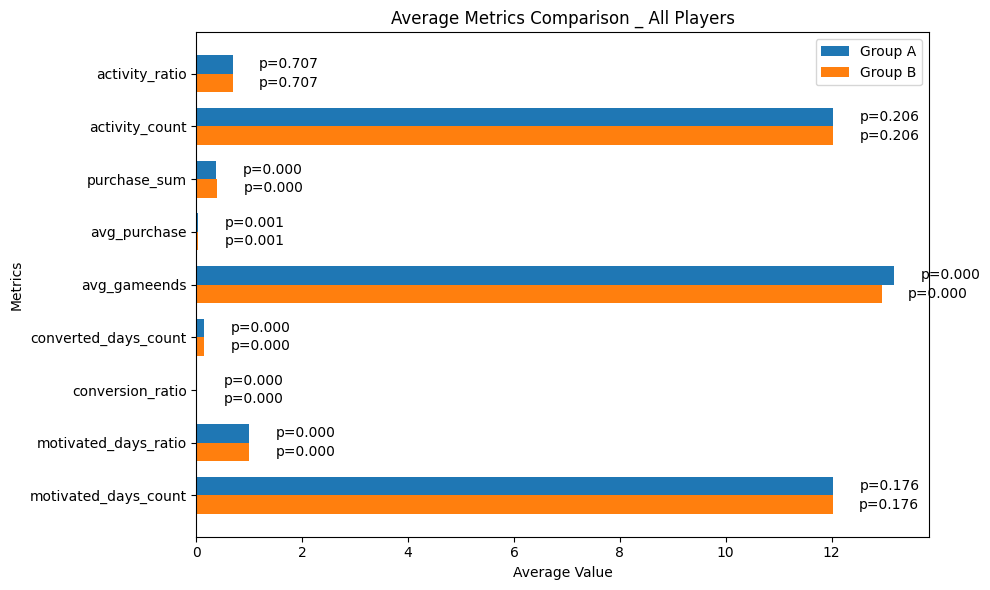

In [4]:
from src.utility.plot import plot_stats

plot_stats(mean_values,p_values,'All Players')

In [7]:
mean_values

,activity_ratio,activity_count,purchase_sum,avg_purchase,avg_gameends,converted_days_count,conversion_ratio,motivated_days_ratio,motivated_days_count
abtest_group,,,,,,,,,
A,0.686115,12.028104,0.366211,0.030647,13.182673,0.145542,0.012087,0.999824,12.025982
B,0.686051,12.023382,0.39257,0.032558,12.948998,0.149601,0.012457,0.999798,12.020927


In [8]:
p_values

{'activity_ratio': 0.7067070495835278,
 'activity_count': 0.20587715119237898,
 'purchase_sum': 0.00045762906808346707,
 'avg_purchase': 0.0010570148208763964,
 'avg_gameends': 1.8464792508610926e-217,
 'converted_days_count': 1.7628050671037306e-06,
 'conversion_ratio': 5.2528450658434686e-08,
 'motivated_days_ratio': 6.409051694936138e-09,
 'motivated_days_count': 0.17553549514558062}